## Load packages

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

plt.style.use('ggplot')

## Import training and test data

In [2]:
training_data_df = pd.read_csv("data/sales_data_training.csv")
test_data_df = pd.read_csv("data/sales_data_test.csv")

In [3]:
training_data_df.head()

,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,3.5,1,0,1,0,1,0,0,132717,59.99
1,4.5,0,0,0,0,1,1,0,83407,49.99
2,3.0,0,0,0,0,1,1,0,62423,49.99
3,4.5,1,0,0,0,0,0,1,69889,39.99
4,4.0,1,0,1,0,1,0,1,161382,59.99


In [4]:
test_data_df.head()

,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,3.5,1,1,1,0,1,0,1,247537,59.99
1,2.5,0,0,0,1,1,0,0,73960,59.99
2,3.5,0,0,0,0,1,1,0,82671,59.99
3,4.0,1,1,0,0,1,0,0,137456,39.99
4,2.0,1,0,1,0,1,0,0,89639,59.99


## Min-Max Scaling

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_training = scaler.fit_transform(training_data_df)
scaled_testing = scaler.transform(test_data_df)

scaled_training_df = pd.DataFrame(scaled_training, columns=training_data_df.columns)
scaled_testing_df = pd.DataFrame(scaled_testing, columns=test_data_df.columns)

In [6]:
scaled_training_df.head()

,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,0.500000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.374714,1.0
1,0.833333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.192425,0.5
2,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.114852,0.5
3,0.833333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.142452,0.0
4,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.480682,1.0


In [7]:
scaled_testing_df.head()

,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,0.500000,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.799179,1.0
1,0.166667,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.157502,1.0
2,0.500000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.189704,1.0
3,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.392233,0.0
4,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.215464,1.0


## Verify against manual calculation
Scaled value = (value - min_old) / (max_old - min_od) * (max_new - min_new) + min_new

In [8]:
scaler.scale_

array([  3.33333333e-01,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   3.69678934e-06,
         5.00000000e-02])

In [9]:
scaler.min_

array([-0.66666667,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.11591283, -1.9995    ])

In [10]:
np.array_equal(scaled_training_df, training_data_df.values * scaler.scale_ + scaler.min_)

True

In [11]:
np.array_equal(scaled_testing_df, test_data_df.values * scaler.scale_ + scaler.min_)

True

## Create training and test data after rescaling

In [12]:
x_train = scaled_training_df.drop('total_earnings', axis=1).values
y_train = scaled_training_df[['total_earnings']].values
x_test = scaled_testing_df.drop('total_earnings', axis=1).values
y_test = scaled_testing_df[['total_earnings']].values

## Build Keras model

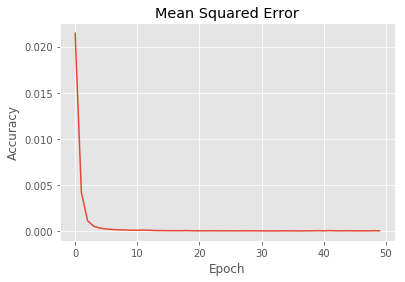

In [26]:
model = Sequential()

model.add(Dense(50, input_dim=9, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss="mean_squared_error", optimizer="adam")
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    shuffle=True,
    verbose=0
)

plt.plot(history.history['loss'])
plt.title('Loss function over')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [14]:
model.evaluate(x_test, y_test, verbose=1)

 32/400 [=>............................] - ETA: 0s

7.0218829205259683e-05

## Save offline model

In [15]:
model.save("model/sales_data_trained_model.h5")

## Load offline model

In [16]:
model = load_model('model/sales_data_trained_model.h5')

In [17]:
scaled_prediction = model.predict(x_test)
scaled_prediction[0:5]

array([[ 0.82455182],
       [ 0.15966935],
       [ 0.19050337],
       [ 0.38933414],
       [ 0.22781973]], dtype=float32)

In [18]:
prediction = (scaled_prediction - scaler.min_[8])/scaler.scale_[8]
target = (y_test - scaler.min_[8])/scaler.scale_[8]
pd.DataFrame(list(zip(prediction, target)), columns=['Prediction', 'Target'])

,Prediction,Target
0,[254400.0],[247537.0]
1,[74546.4],[73960.0]
2,[82887.1],[82671.0]
3,[136672.0],[137456.0]
4,[92981.4],[89639.0]
5,[104682.0],[103734.0]
6,[95467.1],[96766.0]
7,[226480.0],[223148.0]
8,[148079.0],[149979.0]
9,[139641.0],[138418.0]
